In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('car_price.csv')
df

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017.0,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021.0,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016.0,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018.0,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016.0,1199 cc,5 Seats
...,...,...,...,...,...,...,...,...,...,...
5507,5507,BMW X1 sDrive 20d xLine,28.90 Lakh,"45,000 kms",Diesel,Automatic,1st Owner,2018.0,2995 cc,7 Seats
5508,5508,BMW M Series M4 Coupe,64.90 Lakh,"29,000 kms",Petrol,Automatic,2nd Owner,2015.0,1968 cc,5 Seats
5509,5509,Jaguar XF 2.2 Litre Luxury,13.75 Lakh,"90,000 kms",Diesel,Automatic,2nd Owner,2013.0,2755 cc,5 Seats
5510,5510,BMW 7 Series 730Ld,29.90 Lakh,"79,000 kms",Diesel,Automatic,3rd Owner,2015.0,2967 cc,6 Seats


In [28]:
df.shape

(5512, 10)

In [29]:
df.describe()

,Unnamed: 0,manufacture
count,5512.000000,5497.000000
mean,2755.500000,2015.416045
std,1591.321673,5.146357
min,0.000000,1809.000000
25%,1377.750000,2013.000000
50%,2755.500000,2016.000000
75%,4133.250000,2018.000000
max,5511.000000,2109.000000


In [30]:
# unnamed has been removed
#df=df.drop('Unnamed: 0', axis=1)
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017.0,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021.0,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016.0,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018.0,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016.0,1199 cc,5 Seats


In [31]:
df[df.duplicated()]

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats


In [32]:
df = df.drop_duplicates()

In [33]:
df.isna().sum()

Unnamed: 0              0
car_name                2
car_prices_in_rupee     8
kms_driven             18
fuel_type              11
transmission           12
ownership              11
manufacture            15
engine                 13
Seats                  10
dtype: int64

In [34]:
df=df.dropna(subset=["car_name", "car_prices_in_rupee"])

In [35]:
df["fuel_type"] = df["fuel_type"].fillna(df["fuel_type"].mode()[0])
df["transmission"] = df["transmission"].fillna(df["transmission"].mode()[0])

In [36]:
df["ownership"] = df["ownership"].fillna(df["ownership"].mode()[0])
df["manufacture"] = df["manufacture"].fillna(df["manufacture"].mode()[0])
df["Seats"] = df["Seats"].fillna(df["Seats"].mode()[0])

In [37]:
df.isna().sum()

Unnamed: 0              0
car_name                0
car_prices_in_rupee     0
kms_driven             18
fuel_type               0
transmission            0
ownership               0
manufacture             0
engine                 13
Seats                   0
dtype: int64

In [38]:
# Extracting Brand from Car name
def car_brand_extraction(car_name):
    car_brand= car_name.split()[0]
    return car_brand
df['car_name']= df["car_name"].apply(car_brand_extraction)
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017.0,1956 cc,5 Seats
1,1,Renault,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021.0,1330 cc,5 Seats
2,2,Toyota,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016.0,2494 cc,5 Seats
3,3,Honda,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018.0,1199 cc,5 Seats
4,4,Volkswagen,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016.0,1199 cc,5 Seats


In [39]:
df['car_name'].value_counts()

Maruti           1389
Hyundai          1018
Honda             496
Mahindra          315
Mercedes-Benz     283
Tata              268
Toyota            263
BMW               172
Renault           170
Ford              168
Audi              166
Volkswagen        159
Skoda             113
Chevrolet          82
Nissan             63
MG                 62
Kia                61
Land               50
Jeep               49
Volvo              31
Jaguar             30
Datsun             24
Fiat               17
Mini               14
Porsche            10
Lexus              10
Mitsubishi          8
Maserati            5
Isuzu               4
Force               1
Premier             1
Bentley             1
Name: car_name, dtype: int64

In [40]:
def extract_price(car_price):
    car_price_elements = car_price.split()
    if car_price_elements[-1] == 'Lakh':
        return float(car_price_elements[0]) * 100_000    # 1,00,000
    elif car_price_elements[-1] == "Crore":
        return float(car_price_elements[0]) * 100_00_000  #1,00,00,000
    else:
        return float(car_price_elements[0].replace(",", ""))

df["car_prices_in_rupee"] = df["car_prices_in_rupee"].apply(extract_price)
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep,1003000.0,"86,226 kms",Diesel,Manual,1st Owner,2017.0,1956 cc,5 Seats
1,1,Renault,1283000.0,"13,248 kms",Petrol,Automatic,1st Owner,2021.0,1330 cc,5 Seats
2,2,Toyota,1640000.0,"60,343 kms",Petrol,Automatic,1st Owner,2016.0,2494 cc,5 Seats
3,3,Honda,777000.0,"26,696 kms",Petrol,Automatic,1st Owner,2018.0,1199 cc,5 Seats
4,4,Volkswagen,515000.0,"69,414 kms",Petrol,Manual,1st Owner,2016.0,1199 cc,5 Seats


In [41]:
#def car_price_extraction(car_price):
#   car_elements = car_price.split()
#   if car_elements[-1]=='Lakh':
#       return float(car_elements[0]) * 100_000
#    elif car_elements[-1]=='Crore':
#        return float(car_elements[0]) * 100_00_000
#    else:
#        return float(car_elements[0].replace(",", " "))

#df['car_prices_in_rupee'] = df['car_prices_in_rupee'].apply(car_price_extraction)
#car_price_extraction(car_prices_in_rupee)
#df.head()

In [42]:
def convert_km_to_numbers(kms):
    kms_in_numbers = int(kms.split()[0].replace(",", ""))
    return kms_in_numbers

df["kms_driven"] = df["kms_driven"].apply(lambda i: np.nan if pd.isna(i) else convert_km_to_numbers(i))
df["kms_driven"].fillna(df["kms_driven"].mean())
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep,1003000.0,86226.0,Diesel,Manual,1st Owner,2017.0,1956 cc,5 Seats
1,1,Renault,1283000.0,13248.0,Petrol,Automatic,1st Owner,2021.0,1330 cc,5 Seats
2,2,Toyota,1640000.0,60343.0,Petrol,Automatic,1st Owner,2016.0,2494 cc,5 Seats
3,3,Honda,777000.0,26696.0,Petrol,Automatic,1st Owner,2018.0,1199 cc,5 Seats
4,4,Volkswagen,515000.0,69414.0,Petrol,Manual,1st Owner,2016.0,1199 cc,5 Seats


In [43]:
df["fuel_type"].value_counts()

Petrol      2969
Diesel      2412
Cng           80
Lpg           28
Electric      14
Name: fuel_type, dtype: int64

In [44]:
col_OHE = pd.get_dummies(df["fuel_type"])
col_OHE.pop(col_OHE.columns[-1])
df = pd.concat([df, col_OHE], axis=1)
df = df.drop("fuel_type", axis=1)
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,transmission,ownership,manufacture,engine,Seats,Cng,Diesel,Electric,Lpg
0,0,Jeep,1003000.0,86226.0,Manual,1st Owner,2017.0,1956 cc,5 Seats,0,1,0,0
1,1,Renault,1283000.0,13248.0,Automatic,1st Owner,2021.0,1330 cc,5 Seats,0,0,0,0
2,2,Toyota,1640000.0,60343.0,Automatic,1st Owner,2016.0,2494 cc,5 Seats,0,0,0,0
3,3,Honda,777000.0,26696.0,Automatic,1st Owner,2018.0,1199 cc,5 Seats,0,0,0,0
4,4,Volkswagen,515000.0,69414.0,Manual,1st Owner,2016.0,1199 cc,5 Seats,0,0,0,0


In [45]:
df["transmission"].value_counts()

Manual       3959
Automatic    1544
Name: transmission, dtype: int64

In [46]:
df["transmission"] = df["transmission"].astype("category").cat.codes
df["transmission"] = df["transmission"].apply(
    lambda x: 1 if x == 0 else 0)
df.head()


,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,transmission,ownership,manufacture,engine,Seats,Cng,Diesel,Electric,Lpg
0,0,Jeep,1003000.0,86226.0,0,1st Owner,2017.0,1956 cc,5 Seats,0,1,0,0
1,1,Renault,1283000.0,13248.0,1,1st Owner,2021.0,1330 cc,5 Seats,0,0,0,0
2,2,Toyota,1640000.0,60343.0,1,1st Owner,2016.0,2494 cc,5 Seats,0,0,0,0
3,3,Honda,777000.0,26696.0,1,1st Owner,2018.0,1199 cc,5 Seats,0,0,0,0
4,4,Volkswagen,515000.0,69414.0,0,1st Owner,2016.0,1199 cc,5 Seats,0,0,0,0


In [47]:
df["ownership"].value_counts()

1st Owner    3730
2nd Owner    1310
3rd Owner     357
4th Owner      84
5th Owner      12
0th Owner       7
9th Owner       1
7th Owner       1
5st Owner       1
Name: ownership, dtype: int64

In [48]:
def get_ownership(ownership):
    ownership_in_int = int(ownership.split()[0][0])
    return ownership_in_int

df["ownership"] = df["ownership"].apply(get_ownership)
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,transmission,ownership,manufacture,engine,Seats,Cng,Diesel,Electric,Lpg
0,0,Jeep,1003000.0,86226.0,0,1,2017.0,1956 cc,5 Seats,0,1,0,0
1,1,Renault,1283000.0,13248.0,1,1,2021.0,1330 cc,5 Seats,0,0,0,0
2,2,Toyota,1640000.0,60343.0,1,1,2016.0,2494 cc,5 Seats,0,0,0,0
3,3,Honda,777000.0,26696.0,1,1,2018.0,1199 cc,5 Seats,0,0,0,0
4,4,Volkswagen,515000.0,69414.0,0,1,2016.0,1199 cc,5 Seats,0,0,0,0


In [49]:
df["manufacture"].value_counts()

2017.0    628
2015.0    527
2018.0    521
2019.0    490
2016.0    468
2014.0    459
2013.0    371
2020.0    346
2021.0    340
2012.0    300
2011.0    263
2010.0    217
2022.0    144
2009.0    132
2008.0    113
2007.0     60
2006.0     42
2005.0     28
2004.0     16
2002.0     13
2003.0      8
2000.0      4
1998.0      2
2001.0      2
1809.0      1
1995.0      1
2023.0      1
1921.0      1
2027.0      1
2109.0      1
2030.0      1
2025.0      1
1999.0      1
Name: manufacture, dtype: int64

In [50]:
def get_age(year):
    age = 2023 - year
    return age

df["manufacture"] = df["manufacture"].apply(get_age)
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,transmission,ownership,manufacture,engine,Seats,Cng,Diesel,Electric,Lpg
0,0,Jeep,1003000.0,86226.0,0,1,6.0,1956 cc,5 Seats,0,1,0,0
1,1,Renault,1283000.0,13248.0,1,1,2.0,1330 cc,5 Seats,0,0,0,0
2,2,Toyota,1640000.0,60343.0,1,1,7.0,2494 cc,5 Seats,0,0,0,0
3,3,Honda,777000.0,26696.0,1,1,5.0,1199 cc,5 Seats,0,0,0,0
4,4,Volkswagen,515000.0,69414.0,0,1,7.0,1199 cc,5 Seats,0,0,0,0


In [51]:
def get_cc(cc):
    cc_in_int = int(cc.split()[0])
    return cc_in_int

df["engine"] = df["engine"].apply(lambda i: np.nan if pd.isna(i) else get_cc(i))
df["engine"].fillna(df["engine"].mean())
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,transmission,ownership,manufacture,engine,Seats,Cng,Diesel,Electric,Lpg
0,0,Jeep,1003000.0,86226.0,0,1,6.0,1956.0,5 Seats,0,1,0,0
1,1,Renault,1283000.0,13248.0,1,1,2.0,1330.0,5 Seats,0,0,0,0
2,2,Toyota,1640000.0,60343.0,1,1,7.0,2494.0,5 Seats,0,0,0,0
3,3,Honda,777000.0,26696.0,1,1,5.0,1199.0,5 Seats,0,0,0,0
4,4,Volkswagen,515000.0,69414.0,0,1,7.0,1199.0,5 Seats,0,0,0,0


In [52]:
def get_seats(seat):
    seat_in_int = int(seat.split()[0])
    return seat_in_int

df["Seats"] = df["Seats"].apply(get_seats)
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,transmission,ownership,manufacture,engine,Seats,Cng,Diesel,Electric,Lpg
0,0,Jeep,1003000.0,86226.0,0,1,6.0,1956.0,5,0,1,0,0
1,1,Renault,1283000.0,13248.0,1,1,2.0,1330.0,5,0,0,0,0
2,2,Toyota,1640000.0,60343.0,1,1,7.0,2494.0,5,0,0,0,0
3,3,Honda,777000.0,26696.0,1,1,5.0,1199.0,5,0,0,0,0
4,4,Volkswagen,515000.0,69414.0,0,1,7.0,1199.0,5,0,0,0,0


In [53]:
car_name_OHE = pd.get_dummies(df["car_name"])
car_name_OHE = car_name_OHE.drop(car_name_OHE.columns[-1], axis = 1)
df = pd.concat([car_name_OHE,df], axis = 1)
df = df.drop("car_name",axis = 1)
df.head()

,Audi,BMW,Bentley,Chevrolet,Datsun,Fiat,Force,Ford,Honda,Hyundai,...,kms_driven,transmission,ownership,manufacture,engine,Seats,Cng,Diesel,Electric,Lpg
0,0,0,0,0,0,0,0,0,0,0,...,86226.0,0,1,6.0,1956.0,5,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,13248.0,1,1,2.0,1330.0,5,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,60343.0,1,1,7.0,2494.0,5,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,26696.0,1,1,5.0,1199.0,5,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,69414.0,0,1,7.0,1199.0,5,0,0,0,0


In [54]:
df.describe()

,Audi,BMW,Bentley,Chevrolet,Datsun,Fiat,Force,Ford,Honda,Hyundai,...,kms_driven,transmission,ownership,manufacture,engine,Seats,Cng,Diesel,Electric,Lpg
count,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,...,5.485000e+03,5503.000000,5503.000000,5503.000000,5490.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000
mean,0.030165,0.031256,0.000182,0.014901,0.004361,0.003089,0.000182,0.030529,0.090133,0.184990,...,6.343951e+04,0.280574,1.424314,7.580956,1535.582514,5.252589,0.014538,0.438306,0.002544,0.005088
std,0.171058,0.174024,0.013480,0.121168,0.065902,0.055500,0.013480,0.172053,0.286398,0.388325,...,4.426322e+04,0.449321,0.715694,5.143306,602.205834,0.732099,0.119703,0.496224,0.050379,0.071156
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.500000e+02,0.000000,0.000000,-86.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.308800e+04,0.000000,1.000000,5.000000,1197.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.921500e+04,0.000000,1.000000,7.000000,1396.000000,5.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.434600e+04,1.000000,2.000000,10.000000,1950.000000,5.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.120000e+06,1.000000,9.000000,214.000000,10997.000000,15.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
df.isna().sum()

Audi                    0
BMW                     0
Bentley                 0
Chevrolet               0
Datsun                  0
Fiat                    0
Force                   0
Ford                    0
Honda                   0
Hyundai                 0
Isuzu                   0
Jaguar                  0
Jeep                    0
Kia                     0
Land                    0
Lexus                   0
MG                      0
Mahindra                0
Maruti                  0
Maserati                0
Mercedes-Benz           0
Mini                    0
Mitsubishi              0
Nissan                  0
Porsche                 0
Premier                 0
Renault                 0
Skoda                   0
Tata                    0
Toyota                  0
Volkswagen              0
Unnamed: 0              0
car_prices_in_rupee     0
kms_driven             18
transmission            0
ownership               0
manufacture             0
engine                 13
Seats       

In [56]:
df["kms_driven"] = df["kms_driven"].fillna(value = df["kms_driven"].mean())
df["engine"] = df["engine"].fillna(value = df["engine"].mean())

In [58]:
df.shape

(5503, 43)

In [59]:
df.isna().sum()

Audi                   0
BMW                    0
Bentley                0
Chevrolet              0
Datsun                 0
Fiat                   0
Force                  0
Ford                   0
Honda                  0
Hyundai                0
Isuzu                  0
Jaguar                 0
Jeep                   0
Kia                    0
Land                   0
Lexus                  0
MG                     0
Mahindra               0
Maruti                 0
Maserati               0
Mercedes-Benz          0
Mini                   0
Mitsubishi             0
Nissan                 0
Porsche                0
Premier                0
Renault                0
Skoda                  0
Tata                   0
Toyota                 0
Volkswagen             0
Unnamed: 0             0
car_prices_in_rupee    0
kms_driven             0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
Cng                    0


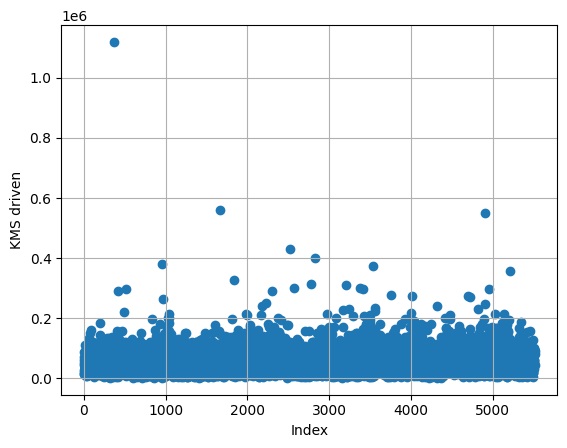

In [60]:
plt.scatter(df.index, df["kms_driven"])
plt.grid()
plt.xlabel("Index")
plt.ylabel("KMS driven")
plt.show()

In [61]:
df = df[df["kms_driven"] < 400000]


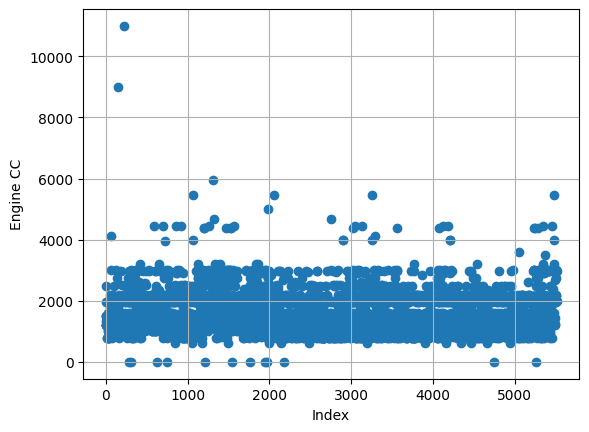

In [62]:
plt.scatter(df.index, df["engine"])
plt.grid()
plt.xlabel("Index")
plt.ylabel("Engine CC")
plt.show()

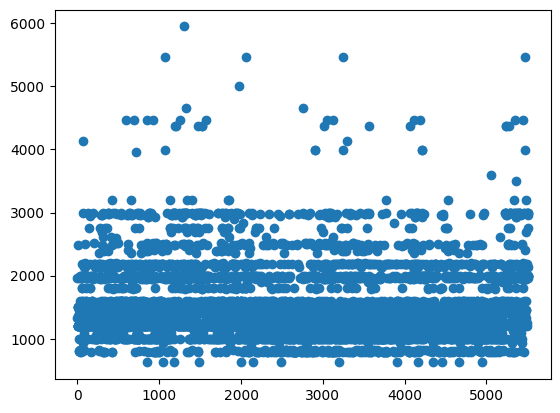

In [63]:
df = df[(df["engine"] >= 624) & (df["engine"] <= 6000)]
plt.scatter(df.index, df["engine"])

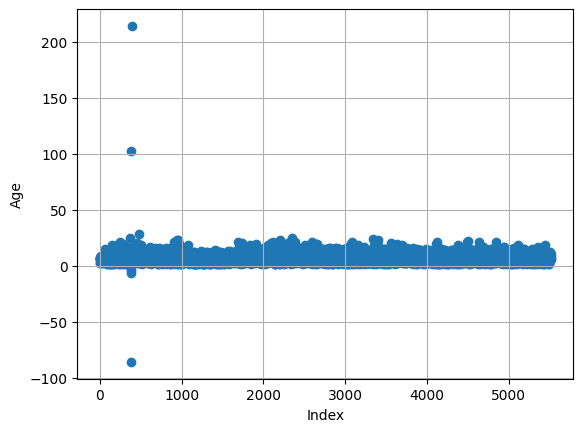

In [64]:
plt.scatter(df.index, df["manufacture"])
plt.grid()
plt.xlabel("Index")
plt.ylabel("Age")
plt.show()

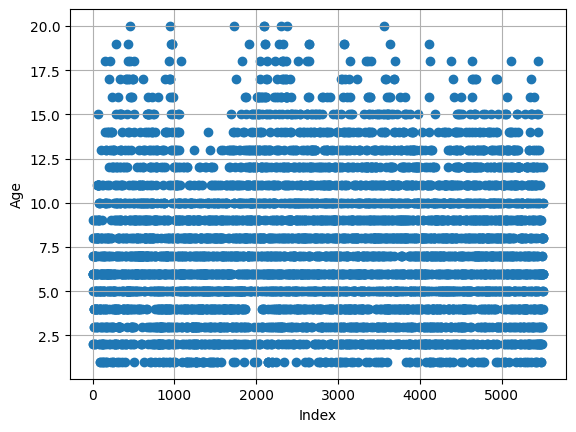

In [65]:
df = df[(df["manufacture"] <= 20) & (df["manufacture"] > 0)]
plt.scatter(df.index, df["manufacture"])
plt.grid()
plt.xlabel("Index")
plt.ylabel("Age")
plt.show()

In [66]:
df.head()

,Audi,BMW,Bentley,Chevrolet,Datsun,Fiat,Force,Ford,Honda,Hyundai,...,kms_driven,transmission,ownership,manufacture,engine,Seats,Cng,Diesel,Electric,Lpg
0,0,0,0,0,0,0,0,0,0,0,...,86226.0,0,1,6.0,1956.0,5,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,13248.0,1,1,2.0,1330.0,5,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,60343.0,1,1,7.0,2494.0,5,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,26696.0,1,1,5.0,1199.0,5,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,69414.0,0,1,7.0,1199.0,5,0,0,0,0


In [67]:
df.shape

(5454, 43)

In [68]:
df.to_csv("df_plain.csv", index=False)